# Keras

Can use Tensorflow, Theano, CNTK as backends. Tensorflow is the most popular and backed by Google.

[Why Keras?](https://keras.io/why-use-keras/)

```
pip install keras
```

In [126]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [127]:
#flatten 2 image dimesions to one
train_images = train_images.reshape((60000, 28 * 28))
#scale to range [0,1]
train_images = train_images.astype('float32') / 255

#the same for test set
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

#vectorize labels
from keras.utils import to_categorical
print(test_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(test_labels[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [128]:
# https://keras.io/models/sequential/
network = Sequential()
#relu = lambda x: max(0, x)
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01)
network.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

fit_params = dict(epochs=10, batch_size=128, validation_split=0.33)

In [129]:
history = network.fit(train_images, train_labels, **fit_params)

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 2s 38us/step - loss: 1.3329 - acc: 0.6893 - val_loss: 0.7857 - val_acc: 0.8350
Epoch 2/10
40199/40199 [==============================] - 1s 33us/step - loss: 0.6497 - acc: 0.8535 - val_loss: 0.5364 - val_acc: 0.8739
Epoch 3/10
40199/40199 [==============================] - 1s 35us/step - loss: 0.5002 - acc: 0.8761 - val_loss: 0.4488 - val_acc: 0.8858
Epoch 4/10
40199/40199 [==============================] - 1s 33us/step - loss: 0.4345 - acc: 0.8871 - val_loss: 0.4031 - val_acc: 0.8945
Epoch 5/10
40199/40199 [==============================] - 1s 33us/step - loss: 0.3963 - acc: 0.8946 - val_loss: 0.3748 - val_acc: 0.8989
Epoch 6/10
40199/40199 [==============================] - 1s 34us/step - loss: 0.3703 - acc: 0.8992 - val_loss: 0.3553 - val_acc: 0.9024
Epoch 7/10
40199/40199 [==============================] - 1s 34us/step - loss: 0.3511 - acc: 0.9039 - val_loss: 0.3405 - val_acc

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


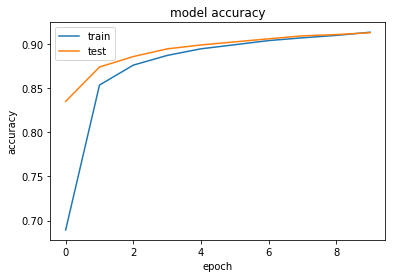

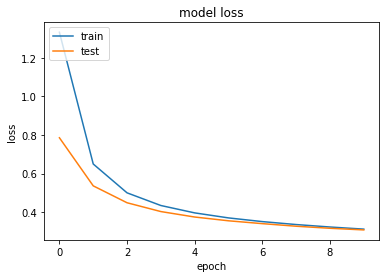

In [130]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [131]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 41us/step
test_acc: 0.9204


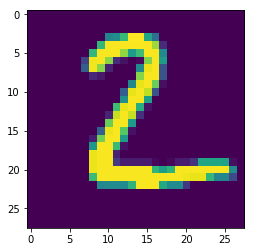

In [132]:
import matplotlib.pyplot as plt
plt.imshow(test_images[1].reshape(28, 28))

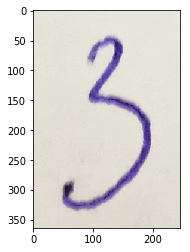

In [133]:
from PIL import Image, ImageChops
tryLoadImage = Image.open('./digits/digit_3.png')
plt.imshow(tryLoadImage)

In [134]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk('./digits'):
    f.extend(map(lambda n: './digits/' + n, filenames))
    break
print(f)

['./digits/digit_8.png', './digits/digit_2.png', './digits/digit_0.png', './digits/digit_6.png', './digits/digit_9.png', './digits/digit_1.png', './digits/digit_5.png', './digits/digit_3.png', './digits/digit_7.png', './digits/digit_4.png']


In [135]:
import numpy as np
import PIL.ImageOps  

def loadAndFitImage(im):
    # trim borders
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    result = im
    if bbox:
        result = im.crop(bbox)
    # convert to greyscale and resize
    result = result.convert('L')
    result.thumbnail((18, 18))
    # add borders again to fit to 28*28
    if result.width < 28 or result.height < 28:
        bg = Image.new('L', (28, 28), 'white')
        xCoord = (28 - result.width) // 2
        yCoord = (28 - result.height) // 2
        bg.paste(result, (xCoord, yCoord))
        result = bg
    return result

def preprocessImage(fileName):
    imSample = loadAndFitImage(Image.open(fileName).convert('1'))
    imSample = PIL.ImageOps.invert(imSample)
    #scale
    return np.array(imSample).reshape(-1).astype('float32') / 255

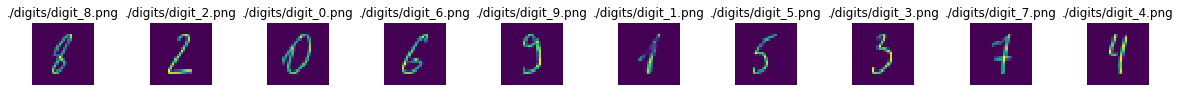

In [136]:
testImages = list(zip(map(preprocessImage, f), f))
plt.figure(figsize=(20,2))
for index, (im, name) in enumerate(testImages):
    plt.subplot(1, len(testImages), index + 1)
    plt.axis('off')
    plt.imshow(im.reshape((28, 28)))
    plt.title('%s' % name)
plt.subplots_adjust(wspace=0.9)

In [137]:
import re
myTestSet = np.array(list(zip(*testImages))[0])
myTestLabels = np.array(list(map(lambda fn: int(re.sub(r'.*([0-9]).*', r'\1', fn)), list(zip(*testImages))[1])))
print(myTestSet[0:1].shape)
print(train_images.shape)
preds = network.predict(myTestSet)
print(preds)
print('predicted:\t', np.argmax(preds, axis=1))
print('real:\t\t', myTestLabels)
preds2 = network.predict(test_images[1:2])
print(np.argmax(preds2, axis=1))

(1, 784)
(60000, 784)
[[0.05207475 0.21043928 0.11444546 0.02739235 0.01805468 0.25690126
  0.12991808 0.00848586 0.14400423 0.03828411]
 [0.10881609 0.1289033  0.24090374 0.14804044 0.00399533 0.1374082
  0.04043199 0.00606628 0.17698687 0.00844775]
 [0.5250503  0.00126604 0.04297846 0.01055487 0.09756576 0.13807358
  0.08338948 0.01167376 0.03497741 0.05447035]
 [0.13171864 0.04247787 0.15742926 0.02809699 0.02917345 0.18845145
  0.28954506 0.00559117 0.11620158 0.01131453]
 [0.02976051 0.01045301 0.06431342 0.2017177  0.01838757 0.04267723
  0.0129174  0.48098803 0.01824236 0.12054279]
 [0.01263213 0.2992149  0.10589749 0.03831348 0.15572432 0.04736428
  0.14680508 0.08460099 0.04457867 0.06486861]
 [0.05397201 0.09635641 0.07733774 0.03420192 0.09606311 0.3374384
  0.13364246 0.02048122 0.10012838 0.0503783 ]
 [0.06257809 0.07605452 0.08910912 0.16227947 0.04771525 0.19021396
  0.06104945 0.14693338 0.05476232 0.10930445]
 [0.00415329 0.15402111 0.08375543 0.08317254 0.13220128 0.0

In [138]:
network.fit(test_images, test_labels, **fit_params)

Train on 6699 samples, validate on 3301 samples
Epoch 1/10
6699/6699 [==============================] - 0s 34us/step - loss: 0.3363 - acc: 0.9074 - val_loss: 0.2033 - val_acc: 0.9467
Epoch 2/10
6699/6699 [==============================] - 0s 34us/step - loss: 0.3304 - acc: 0.9092 - val_loss: 0.2042 - val_acc: 0.9458
Epoch 3/10
6699/6699 [==============================] - 0s 34us/step - loss: 0.3252 - acc: 0.9106 - val_loss: 0.2063 - val_acc: 0.9449
Epoch 4/10
6699/6699 [==============================] - 0s 35us/step - loss: 0.3207 - acc: 0.9121 - val_loss: 0.2069 - val_acc: 0.9449
Epoch 5/10
6699/6699 [==============================] - 0s 33us/step - loss: 0.3164 - acc: 0.9136 - val_loss: 0.2064 - val_acc: 0.9446
Epoch 6/10
6699/6699 [==============================] - 0s 35us/step - loss: 0.3129 - acc: 0.9140 - val_loss: 0.2069 - val_acc: 0.9449
Epoch 7/10
6699/6699 [==============================] - 0s 34us/step - loss: 0.3090 - acc: 0.9155 - val_loss: 0.2066 - val_acc: 0.9452
Epoch 8

In [139]:
print(myTestSet.shape)
print(myTestLabels.shape)
myTestLabelsEncoded = to_categorical(myTestLabels)
print(myTestLabelsEncoded.shape)
print(myTestLabelsEncoded[0])
test_loss, test_acc = network.evaluate(myTestSet, myTestLabelsEncoded)
print('my_test_acc:', test_acc)

preds = network.predict(myTestSet)
print('predicted:\t', np.argmax(preds, axis=1))
print('real:\t\t', myTestLabels)

(10, 784)
(10,)
(10, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
10/10 [==============================] - 0s 289us/step
my_test_acc: 0.699999988079071
predicted:	 [5 2 0 6 7 1 5 5 7 4]
real:		 [8 2 0 6 9 1 5 3 7 4]
